<a href="https://colab.research.google.com/github/Saidul-1/CSE4132-Artificial-Intelligence-Lab/blob/main/Assignment5_CNN_Classifier_MNIST_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write a report in pdf format using any Latex system after:
* building a Convolutional Neural Network (CNN) based 10 class classifier
* training and testing the classifier by using the the:
  * Fashion MNIST dataset.
  * MNIST English dataset.
  * CIFAR-10 dataset.

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist, mnist, cifar10
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def preprocess_data(dataset):
  (trainX, trainY), (testX, testY) = dataset.load_data()

  print(f"trainX shape: {trainX.shape}, trainY shape: {trainY.shape}")
  print(f"testX shape: {testX.shape}, testY shape: {testY.shape}")

  # Make data dimension compatible to Conv2
  if(len(trainX.shape) == 3):
    trainX = np.expand_dims(trainX, -1)
    testX = np.expand_dims(testX, -1)
  # Normalize inputs to [0,1] and ensure float32
  trainX = trainX.astype('float32')/255.0
  testX = testX.astype('float32')/255.0

  # Convert output labels to one-hot encoding (for 10 classes: digits 0-9)
  trainY = to_categorical(trainY, 10)
  testY = to_categorical(testY, 10)

  print("After normalization and labeling:\n")
  print(f"trainX shape: {trainX.shape}, trainY shape: {trainY.shape}")
  print(f"testX shape: {testX.shape}, testY shape: {testY.shape}")

  return (trainX, trainY), (testX, testY)

In [ ]:
from sklearn import metrics
def build_model(input_shape):
  inputs = Input(input_shape)

  x = Conv2D(64, (3,3), activation = 'relu')(inputs)
  x = Conv2D(64, (3,3), activation = 'relu')(x)
  x = MaxPooling2D((2,2))(x)

  x = Conv2D(128, (3,3), activation = 'relu')(x)
  x = Conv2D(128, (3,3), activation = 'relu')(x)
  x = MaxPooling2D((2,2))(x)

  x = Flatten()(x)
  x = Dense(256, activation = 'relu')(x)
  outputs = Dense(10, activation = 'softmax')(x)

  model = Model(inputs, outputs)
  model.summary(show_trainable=True)
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  return model


In [ ]:
def train_model(my_model, trainX, trainY, training_epochs):
  history = my_model.fit(
      trainX, trainY,
      validation_split = 0.2,
      batch_size = 64,
      epochs = training_epochs,
  )
  return history

In [ ]:
def loss_curve(training_history):
  plt.figure(figsize=(8, 6))
  plt.plot(training_history.history['loss'], label='train_loss')
  plt.plot(training_history.history['val_loss'], label='val_loss')
  plt.title('Loss Curves')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
def sample_prediction_plot(testX, testY_labels, predY_labels, class_names):
  plt.figure(figsize=(10, 10))
  num_samples, rows, cols = 25, 5, 5
  for i in range(min(num_samples, len(testX))):
      plt.subplot(rows, cols, i+1)
      plt.axis('off')
      plt.imshow(testX[i])
      color = 'green' if(testY_labels[i] == predY_labels[i]) else 'red'
      plt.title(f'True: {class_names[testY_labels[i]]},\n Pred: {class_names[predY_labels[i]]}', color=color)
  plt.suptitle(f'Sample Predictions from Test Set')
  plt.tight_layout()
  plt.show()

In [ ]:
def classifier_pipeline(dataset, class_names, training_epochs):
  (trainX, trainY), (testX, testY) = preprocess_data(dataset)
  input_shape = trainX.shape[1:]
  model = build_model(input_shape)
  history = train_model(model, trainX, trainY, training_epochs)
  predY = model.predict(testX)
  predY_labels = np.argmax(predY, axis=1)
  testY_labels = np.argmax(testY, axis=1)

  acc = accuracy_score(testY_labels, predY_labels)
  print(f"Accuracy: {acc:.4f}")
  loss_curve(history)
  sample_prediction_plot(testX, testY_labels, predY_labels, class_names)

In [ ]:
def main():
  # Fashion Mnist dataset
  fashion_mnist_classes = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
  ]
  classifier_pipeline(fashion_mnist, fashion_mnist_classes, 12)

  # Mnist dataset
  mnist_classes = [
    "0", "1", "2", "3", "4", "5", "6", "7", "8", "9"
  ]
  classifier_pipeline(mnist, mnist_classes, 10)

  # Cifar10 dataset
  cifar10_classes = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
  ]
  classifier_pipeline(cifar10, cifar10_classes, 15)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
trainX shape: (60000, 28, 28), trainY shape: (60000,)
testX shape: (10000, 28, 28), testY shape: (10000,)
After normalization and labeling:

trainX shape: (60000, 28, 28, 1), trainY shape: (60000, 10)
testX shape: (10000, 28, 28, 1), testY shape: (10000, 10)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer (InputLayer)    │ (None, 28, 28, 1)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d (Conv2D)             │ (None, 26, 26, 64)    │        640 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d_1 (Conv2D)           │ (None, 24, 24, 64)    │     36,928 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ max_pooling2d               │ (None, 12, 12, 64)    │          0 │   -   │
│ (MaxPooling2D)              │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d_2 (Conv2D)           │ (None, 10, 10, 128)   │     73,856 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d_3 (Conv2D)           │ (None, 8, 8, 128)     │    147,584 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ max_pooling2d_1             │ (None, 4, 4, 128)     │          0 │   -   │
│ (MaxPooling2D)              │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ flatten (Flatten)           │ (None, 2048)          │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense (Dense)               │ (None, 256)           │    524,544 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_1 (Dense)             │ (None, 10)            │      2,570 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 786,122 (3.00 MB)

 Trainable params: 786,122 (3.00 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7463 - loss: 0.6939 - val_accuracy: 0.8830 - val_loss: 0.3261
Epoch 2/12
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8896 - loss: 0.3049 - val_accuracy: 0.9020 - val_loss: 0.2631
Epoch 3/12
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9122 - loss: 0.2407 - val_accuracy: 0.9072 - val_loss: 0.2557
Epoch 4/12
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9267 - loss: 0.2028 - val_accuracy: 0.9126 - val_loss: 0.2466
Epoch 5/12
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9333 - loss: 0.1768 - val_accuracy: 0.9203 - val_loss: 0.2206
Epoch 6/12
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9432 - loss: 0.1522 - val_accuracy: 0.9140 - val_loss: 0.2463
Epoch 7/12
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9537 - loss: 0.1268 - val_accuracy: 0.9159 - val_loss: 0.2385
Epoch 8/12
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9629 - loss: 0.1014 - val_accuracy: 

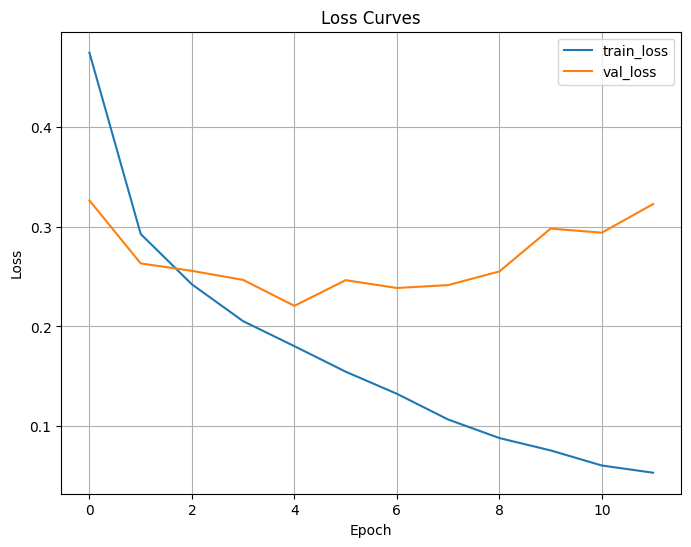

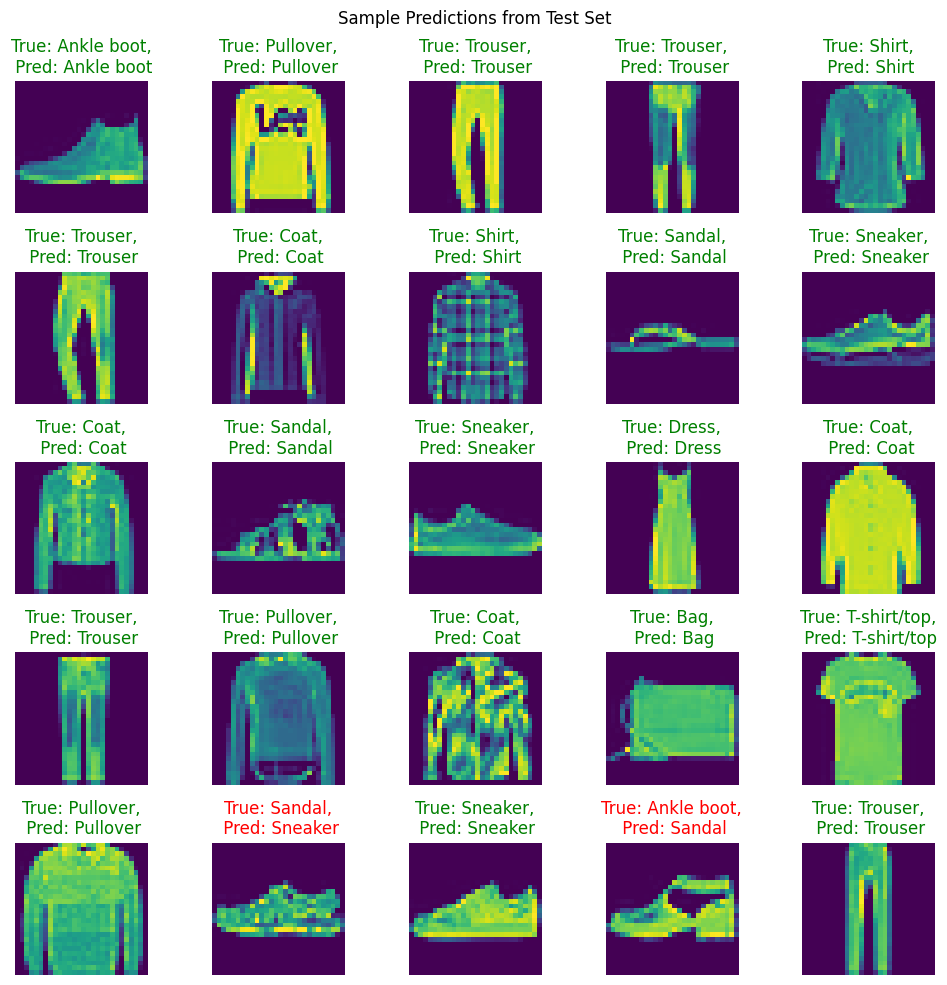

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
trainX shape: (60000, 28, 28), trainY shape: (60000,)
testX shape: (10000, 28, 28), testY shape: (10000,)
After normalization and labeling:

trainX shape: (60000, 28, 28, 1), trainY shape: (60000, 10)
testX shape: (10000, 28, 28, 1), testY shape: (10000, 10)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_1 (InputLayer)  │ (None, 28, 28, 1)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d_4 (Conv2D)           │ (None, 26, 26, 64)    │        640 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d_5 (Conv2D)           │ (None, 24, 24, 64)    │     36,928 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ max_pooling2d_2             │ (None, 12, 12, 64)    │          0 │   -   │
│ (MaxPooling2D)              │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d_6 (Conv2D)           │ (None, 10, 10, 128)   │     73,856 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d_7 (Conv2D)           │ (None, 8, 8, 128)     │    147,584 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ max_pooling2d_3             │ (None, 4, 4, 128)     │          0 │   -   │
│ (MaxPooling2D)              │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ flatten_1 (Flatten)         │ (None, 2048)          │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_2 (Dense)             │ (None, 256)           │    524,544 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_3 (Dense)             │ (None, 10)            │      2,570 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 786,122 (3.00 MB)

 Trainable params: 786,122 (3.00 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9028 - loss: 0.3025 - val_accuracy: 0.9833 - val_loss: 0.0558
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9871 - loss: 0.0420 - val_accuracy: 0.9894 - val_loss: 0.0377
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9920 - loss: 0.0258 - val_accuracy: 0.9876 - val_loss: 0.0433
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9939 - loss: 0.0185 - val_accuracy: 0.9912 - val_loss: 0.0328
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9948 - loss: 0.0144 - val_accuracy: 0.9915 - val_loss: 0.0338
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9961 - loss: 0.0118 - val_accuracy: 0.9907 - val_loss: 0.0337
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9967 - loss: 0.0107 - val_accuracy: 0.9896 - val_loss: 0.0432
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9972 - loss: 0.0093 - val_accuracy: 0

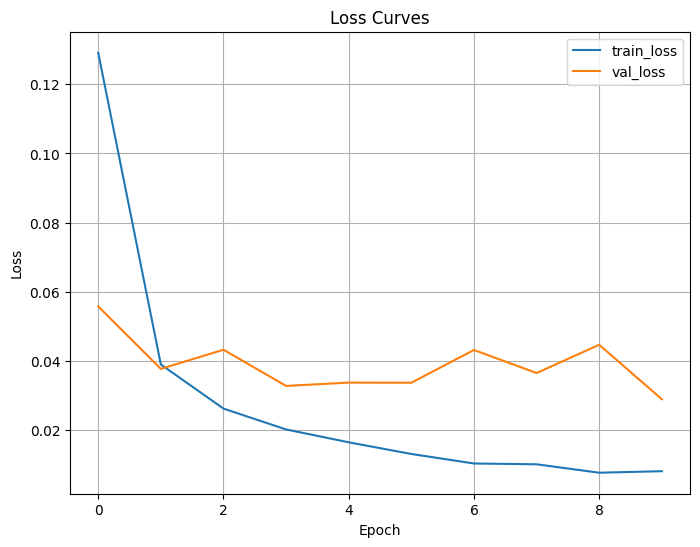

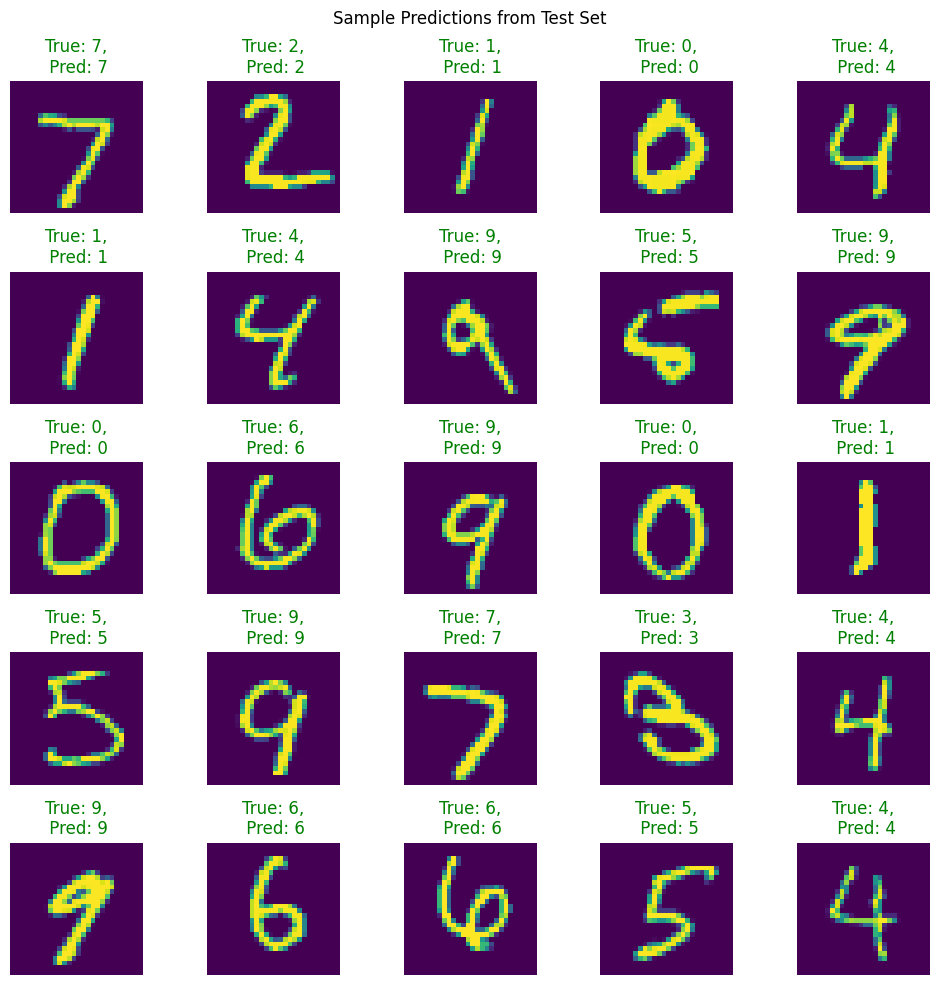

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
trainX shape: (50000, 32, 32, 3), trainY shape: (50000, 1)
testX shape: (10000, 32, 32, 3), testY shape: (10000, 1)
After normalization and labeling:

trainX shape: (50000, 32, 32, 3), trainY shape: (50000, 10)
testX shape: (10000, 32, 32, 3), testY shape: (10000, 10)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_2 (InputLayer)  │ (None, 32, 32, 3)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d_8 (Conv2D)           │ (None, 30, 30, 64)    │      1,792 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d_9 (Conv2D)           │ (None, 28, 28, 64)    │     36,928 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ max_pooling2d_4             │ (None, 14, 14, 64)    │          0 │   -   │
│ (MaxPooling2D)              │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d_10 (Conv2D)          │ (None, 12, 12, 128)   │     73,856 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d_11 (Conv2D)          │ (None, 10, 10, 128)   │    147,584 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ max_pooling2d_5             │ (None, 5, 5, 128)     │          0 │   -   │
│ (MaxPooling2D)              │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ flatten_2 (Flatten)         │ (None, 3200)          │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_4 (Dense)             │ (None, 256)           │    819,456 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_5 (Dense)             │ (None, 10)            │      2,570 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 1,082,186 (4.13 MB)

 Trainable params: 1,082,186 (4.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.3446 - loss: 1.7854 - val_accuracy: 0.5953 - val_loss: 1.1563
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5998 - loss: 1.1226 - val_accuracy: 0.6775 - val_loss: 0.9311
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6987 - loss: 0.8598 - val_accuracy: 0.7083 - val_loss: 0.8413
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7553 - loss: 0.6998 - val_accuracy: 0.7410 - val_loss: 0.7518
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8005 - loss: 0.5754 - val_accuracy: 0.7464 - val_loss: 0.7394
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8316 - loss: 0.4759 - val_accuracy: 0.7513 - val_loss: 0.7668
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8662 - loss: 0.3908 - val_accuracy: 0.7527 - val_loss: 0.7840
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8944 - loss: 0.2998 - val_accu

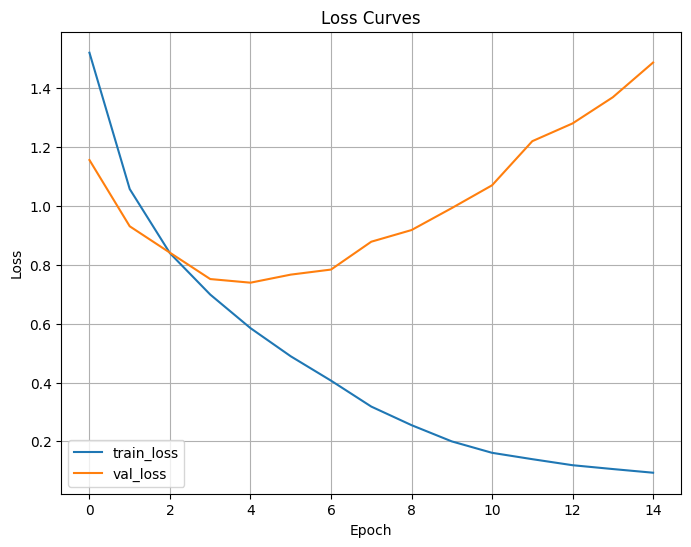

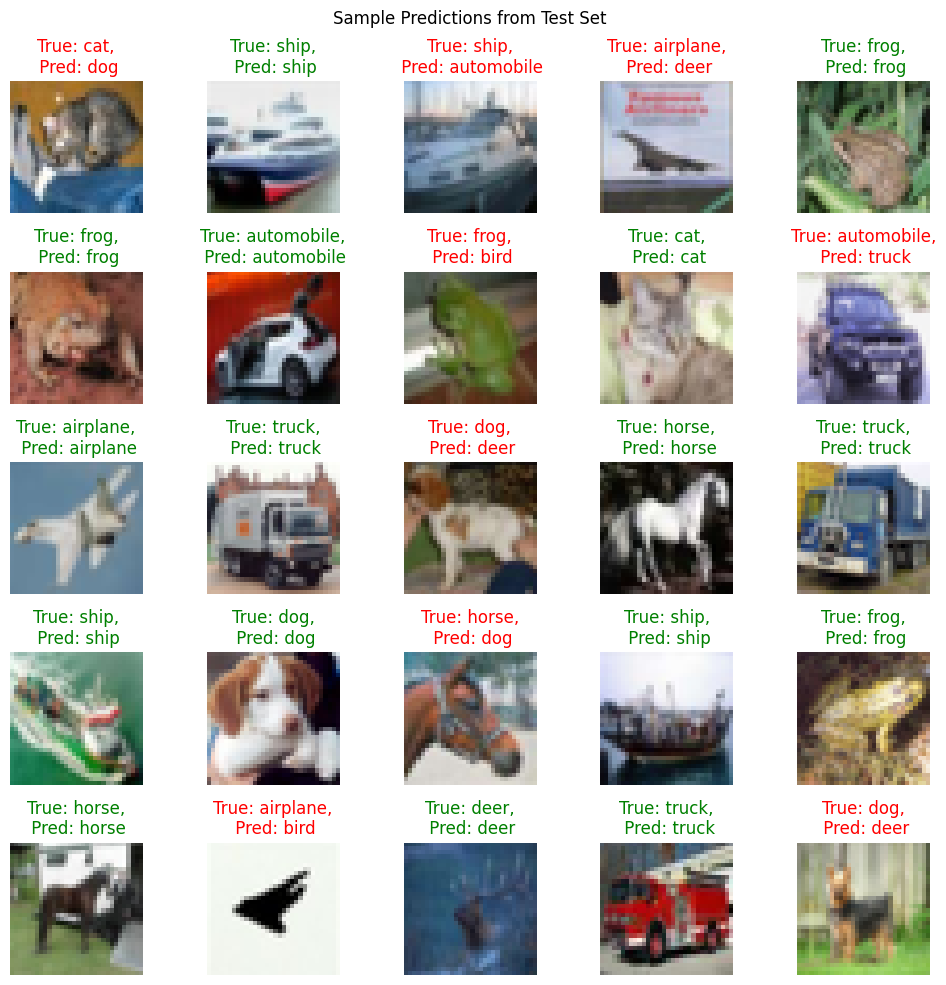

In [ ]:
if __name__ == '__main__':
    main()